<a href="https://colab.research.google.com/github/beratcmn/tensorflow-cnn-cifar/blob/main/cnn_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow tutorial
https://www.tensorflow.org/tutorials/images/cnn

### Importing the libraries

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt

tf.__version__

'2.11.0'

### Downloading the CIFAR10 dataset

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [5]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Exploring the data

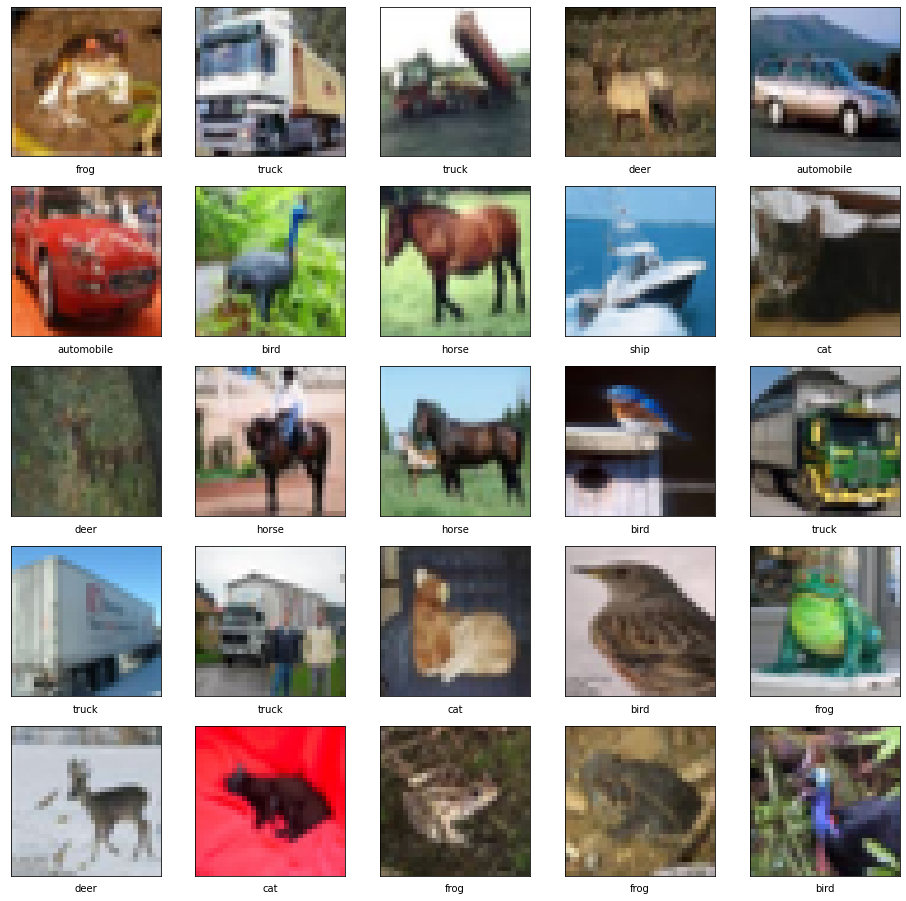

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Creating the model

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10),
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

### Compiling the model

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [12]:
EPOCHS = 16
history = model.fit(train_images, train_labels, epochs=EPOCHS, 
                    validation_data=(test_images, test_labels))

Epoch 1/16
1563/1563 [==============================] - 22s 7ms/step - loss: 1.5049 - accuracy: 0.4523 - val_loss: 1.3099 - val_accuracy: 0.5451
Epoch 2/16
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1412 - accuracy: 0.5961 - val_loss: 1.0461 - val_accuracy: 0.6328
Epoch 3/16
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9906 - accuracy: 0.6515 - val_loss: 0.9784 - val_accuracy: 0.6532
Epoch 4/16
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8864 - accuracy: 0.6886 - val_loss: 0.9080 - val_accuracy: 0.6858
Epoch 5/16
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8183 - accuracy: 0.7132 - val_loss: 0.9114 - val_accuracy: 0.6876
Epoch 6/16
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7559 - accuracy: 0.7359 - val_loss: 0.9132 - val_accuracy: 0.6898
Epoch 7/16
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7106 - accuracy: 0.7496 - val_loss: 0.9031 - val_accurac

### Testing the model

313/313 - 2s - loss: 1.0134 - accuracy: 0.7052 - 2s/epoch - 5ms/step


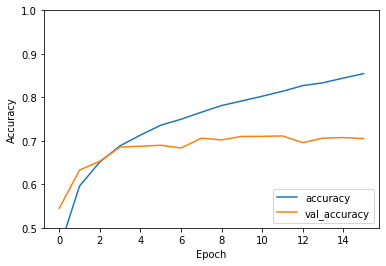

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [14]:
print("Test Accuracy:", test_acc)

Test Accuracy: 0.7052000164985657
